# Lab 7: Expectation Maximization

In this lab we will be using the library scikit-learn to compute a Gaussian Mixture Model and graph the results for the iris dataset's petal length and petal width.

[VIDEO LINK](https://drive.google.com/file/d/1C2hU2ugVOsjrsB10aP-VJRAv6_azIBeD/view?usp=sharing)

## Task 1: 

1. Install `sklearn` using:
    1. `pip install -U scikit-learn`
    1. (might be pip3 depending on computer)
2. Restart your jupyter notebook server. 
    1. (eg. type `Ctrl-C`, then `Y` in the terminal running the server).
3. Run the below cell to import your libraries and load the iris dataset.
    1. We will be working with `X[0]` petal length (cm) and `X[1]` petal width (cm)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LogNorm

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

## Task 2: Create a Gaussian Mixture Model of the data

1. Use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to fit and transform X, overwriting the X data with the transformed data.
2. Use [Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) [(more info)](https://scikit-learn.org/stable/modules/mixture.html) to create a Gaussian Mixture model (gmm).
    1. Fit the gmm to the X data.
    2. Use the gmm to predict y values for the X data.
1. Create a plot with 2 subplots.
    1. In the first subplot, create a scatterplot, with petal length on the x-axis, petal width on the Y axis and color based on actual y values.
    2. In the second subplot, Create a scatterplot, with petal length on the x-axis, petal width on the Y axis and color based on the predicted y values.
    3. Make sure to give your plots meaningful axis labels and title.
4. Looking at the graph, choose the number of mixture components you think is best and re-run the above code with `n_components` assigned when creating the Gaussian Mixture Model.

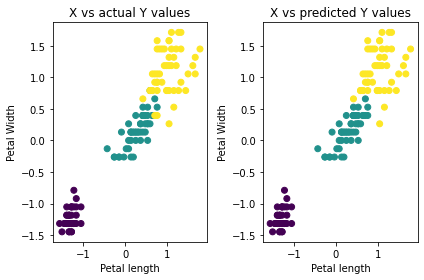

In [3]:
scaler = StandardScaler(copy = False)
scaler.fit(X)
X = scaler.transform(X)

gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X,y)
predict_X = gmm.predict(X)

fig, ax = plt.subplots(1,2)
ax[0].set_title("X vs actual Y values")
ax[0].set_xlabel("Petal length")
ax[0].set_ylabel("Petal Width")
ax[0].scatter(X[:,0], X[:,1], c = y)
ax[1].scatter(X[:,0], X[:,1], c = predict_X)
ax[1].set_title("X vs predicted Y values")
ax[1].set_xlabel("Petal length")
ax[1].set_ylabel("Petal Width")

fig.tight_layout()
plt.show()

## Task 3: Graph negative log-likelihood predition

1. Create a grid of values to create a contour map
    1. Make a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) from -3 to 3.
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) `x_samples` [flattened](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html) and `y_samples` flattened.
1. Use a [Gaussian Mixture method](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to compute the weighted log probabilities for each sample negated.  Reshape the results to the same shape as the meshgrid.
1. In 1 plot, graph your results
    1. Using a contour, graph your `x_samples`, `y_samples` and results.
        1. Set the parameter levels to `np.logspace(0, 3, 10)`
        2. Set the parameter norm to LogNorm, with vmin = 1 and vmax = the max value of Z.
    1. Add a colorbar with the contour as a parameter
    1. Graph a scatterplot with petal length on the x-axis, petal width on the Y axis
    1. Add a meaningful title and axis labels
    
*You may receive the Userwarning: "Log scale: values of z <= 0 have been masked".  That is okay.*

(2500, 2)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


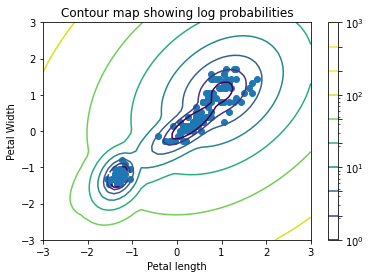

In [4]:
linspace = np.linspace(-3,3)
x_samples, y_samples = np.meshgrid(linspace, linspace)
pairs = np.column_stack((x_samples.flatten(), y_samples.flatten()))
print(pairs.shape)

gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)
prob = gmm.score_samples(pairs)
prob = -prob.reshape((50,50))

fig, ax = plt.subplots()
CS = ax.contour(x_samples, y_samples, prob, levels = np.logspace(0, 3, 10), norm = LogNorm(vmin=1, vmax=np.max(prob)))
cbar = fig.colorbar(CS)
ax.scatter(X[:,0], X[:,1])
ax.set_title('Contour map showing log probabilities')
ax.set_xlabel("Petal length")
ax.set_ylabel("Petal Width")
plt.show()